<a href="https://colab.research.google.com/github/afshari-maryam/Adversarial-domain-adaptation/blob/main/Statistics_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Every group have  to download the Excel files:
2. Each file has three recorded values of water flow recorded using three sensors S1,S2, and S3.

  2.1. Compute the covariance between three variables

  2.2.Compute the correlation coefficients between three variables

  2.3. Plot and report the relationships between the variables

  2.4. Generate a random sample of 50 observations for each sensor

  2.5. Compute the upper and the lower bounds with confidence intervals 90%, 95%, 99%.

  2.6. Compare the population means of each sample with the estimated one given the samples


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Read Excel file
df = pd.read_excel('/content/drive/MyDrive/Assignment-Math-for-ML/Group5.xlsx')
print(df)

      S1   S2   S3
0    502  378  314
1    491  369  390
2    472  363  344
3    470  386  355
4    477  389  383
..   ...  ...  ...
127  500  385  314
128  458  378  371
129  488  386  389
130  509  378  306
131  516  347  327

[132 rows x 3 columns]


# 2.1.
**Compute the covariance between three variables**

In [ ]:
cov_matrix = df.cov()
print(cov_matrix)

            S1          S2          S3
S1  355.498034   54.396253    9.307425
S2   54.396253  274.075642  160.689105
S3    9.307425  160.689105  905.634976


#2.2.
**Compute the correlation coefficients between three variables**

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

          S1        S2        S3
S1  1.000000  0.174267  0.016403
S2  0.174267  1.000000  0.322533
S3  0.016403  0.322533  1.000000


# 2.3. 
**Plot and report the relationships between the variables**

array([[<Axes: xlabel='S1', ylabel='S1'>,
        <Axes: xlabel='S2', ylabel='S1'>,
        <Axes: xlabel='S3', ylabel='S1'>],
       [<Axes: xlabel='S1', ylabel='S2'>,
        <Axes: xlabel='S2', ylabel='S2'>,
        <Axes: xlabel='S3', ylabel='S2'>],
       [<Axes: xlabel='S1', ylabel='S3'>,
        <Axes: xlabel='S2', ylabel='S3'>,
        <Axes: xlabel='S3', ylabel='S3'>]], dtype=object)

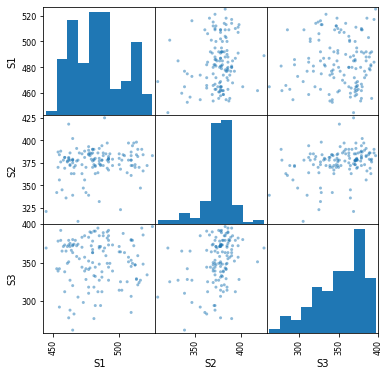

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(6, 6))

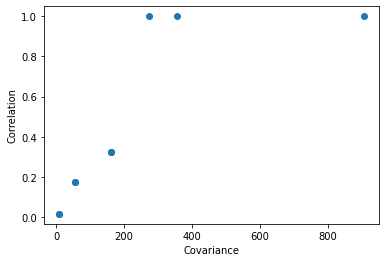

In [ ]:
import matplotlib.pyplot as plt

cov_matrix = df.cov()
corr_matrix = df.corr()

cov_values = cov_matrix.values.flatten()
corr_values = corr_matrix.values.flatten()

plt.scatter(cov_values, corr_values)
plt.xlabel("Covariance")
plt.ylabel("Correlation")
plt.show()


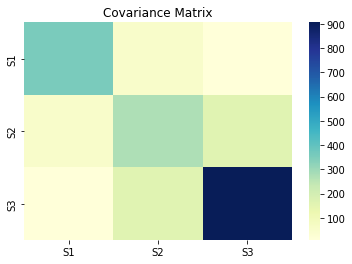

In [ ]:
import seaborn as sns

cov_matrix = df.cov()

sns.heatmap(cov_matrix, cmap="YlGnBu")
plt.title("Covariance Matrix")
plt.show()


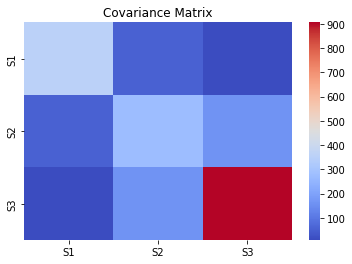

In [ ]:
import seaborn as sns

cov_matrix = df.cov()

sns.heatmap(cov_matrix, cmap='coolwarm')
plt.title('Covariance Matrix')
plt.show()


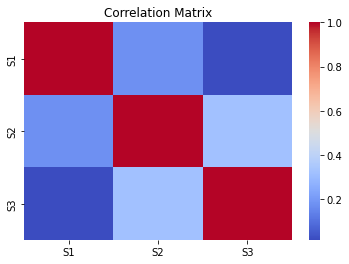

In [ ]:
import seaborn as sns

corr_matrix = df.corr()

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 2.4. 
**Generate a random sample of 50 observations for each sensor**

In [ ]:
sample_size = 50
s1_sample = df['S1'].sample(sample_size, random_state=1)
s2_sample = df['S2'].sample(sample_size, random_state=2)
s3_sample = df['S3'].sample(sample_size, random_state=3)


#2.5.
**Compute the upper and the lower bounds with confidence intervals 90%, 95%, 99%.**

In [ ]:
import scipy.stats as stats

alpha_values = [0.10, 0.05, 0.01]
sample_mean = s1_sample.mean()
sample_std = s1_sample.std(ddof=1)
sample_size = len(s1_sample)

for alpha in alpha_values:
    t = stats.t.interval(alpha, sample_size - 1)
    lower_bound = sample_mean + t[0] * sample_std / (sample_size ** 0.5)
    upper_bound = sample_mean + t[1] * sample_std / (sample_size ** 0.5)
    print(f"Confidence Interval ({1-alpha:.2f}):\t({lower_bound:.2f}, {upper_bound:.2f})")


Confidence Interval (0.90):	(481.73, 482.35)
Confidence Interval (0.95):	(481.89, 482.19)
Confidence Interval (0.99):	(482.01, 482.07)


In [ ]:
alpha_values = [0.10, 0.05, 0.01]
sample_mean = s2_sample.mean()
sample_std = s2_sample.std(ddof=1)
sample_size = len(s2_sample)

for alpha in alpha_values:
    t = stats.t.interval(alpha, sample_size - 1)
    lower_bound = sample_mean + t[0] * sample_std / (sample_size ** 0.5)
    upper_bound = sample_mean + t[1] * sample_std / (sample_size ** 0.5)
    print(f"Confidence Interval ({1-alpha:.2f}):\t({lower_bound:.2f}, {upper_bound:.2f})")


Confidence Interval (0.90):	(373.99, 374.53)
Confidence Interval (0.95):	(374.12, 374.40)
Confidence Interval (0.99):	(374.23, 374.29)


In [ ]:
alpha_values = [0.10, 0.05, 0.01]
sample_mean = s3_sample.mean()
sample_std = s3_sample.std(ddof=1)
sample_size = len(s3_sample)

for alpha in alpha_values:
    t = stats.t.interval(alpha, sample_size - 1)
    lower_bound = sample_mean + t[0] * sample_std / (sample_size ** 0.5)
    upper_bound = sample_mean + t[1] * sample_std / (sample_size ** 0.5)
    print(f"Confidence Interval ({1-alpha:.2f}):\t({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval (0.90):	(351.79, 352.93)
Confidence Interval (0.95):	(352.08, 352.64)
Confidence Interval (0.99):	(352.30, 352.42)


# 2.6.
**Compare the population means of each sample with the estimated one given the samples**

In [ ]:
pop_mean = df['S1'].mean()
t_statistic, p_value = stats.ttest_1samp(s1_sample, pop_mean)

print("S1 sensor:")
print(f"Sample mean: {s1_sample.mean():.2f}")
print(f"Estimated population mean: {pop_mean}")


S1 sensor:
Sample mean: 482.04
Estimated population mean: 483.42424242424244


In [ ]:
pop_mean = df['S2'].mean()
t_statistic, p_value = stats.ttest_1samp(s2_sample, pop_mean)

print("S2 sensor:")
print(f"Sample mean: {s2_sample.mean():.2f}")
print(f"Estimated population mean: {pop_mean}")

S2 sensor:
Sample mean: 374.26
Estimated population mean: 375.59090909090907


In [ ]:
pop_mean = df['S3'].mean()
t_statistic, p_value = stats.ttest_1samp(s3_sample, pop_mean)

print("S3 sensor:")
print(f"Sample mean: {s3_sample.mean():.2f}")
print(f"Estimated population mean: {pop_mean}")

S3 sensor:
Sample mean: 352.36
Estimated population mean: 351.72727272727275


In [ ]:
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

In [ ]:
import scipy.stats as st
import seaborn as sns
# Correlation Figure
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

NameError: ignored